# IMPORTING LIBRARIES

In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA COLLECTION

In [557]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [558]:
dataset.shape

(768, 9)

In [559]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

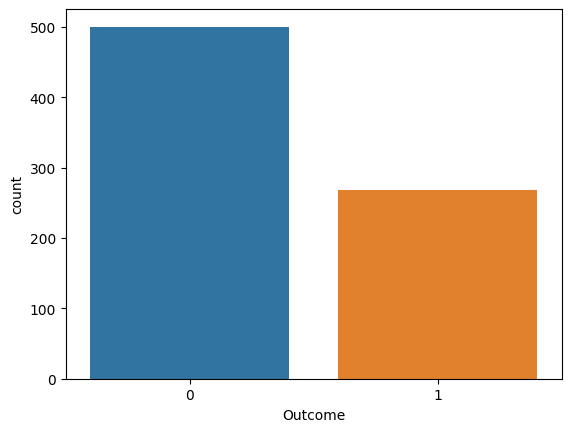

In [560]:
sns.countplot(x = 'Outcome', data = dataset)

In [561]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

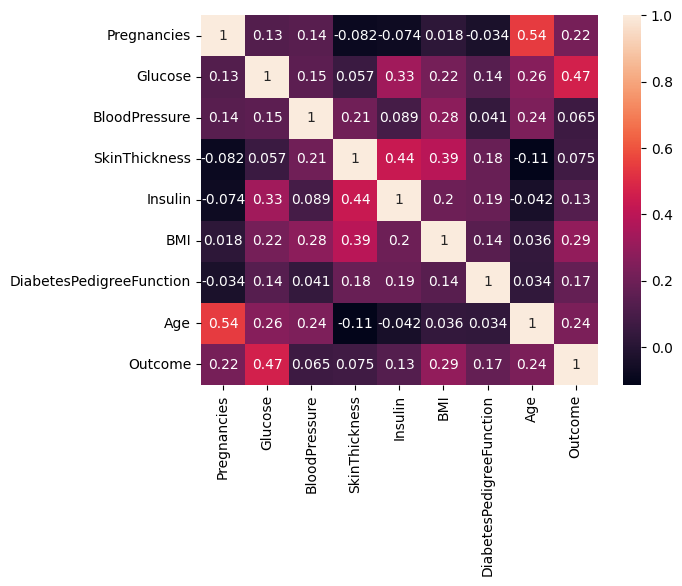

In [562]:
corr_mat = dataset.corr()
sns.heatmap(corr_mat,annot = True)

# DATA CLEANING

In [563]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [564]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,:-1].values

In [565]:
x.shape

(768, 8)

In [566]:
y

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

C:\Users\darkw\AppData\Local\Temp\ipykernel_21760\1323391243.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Glucose"][dataset["Outcome"] ==1])


Text(0.5, 1.0, 'Glucose')

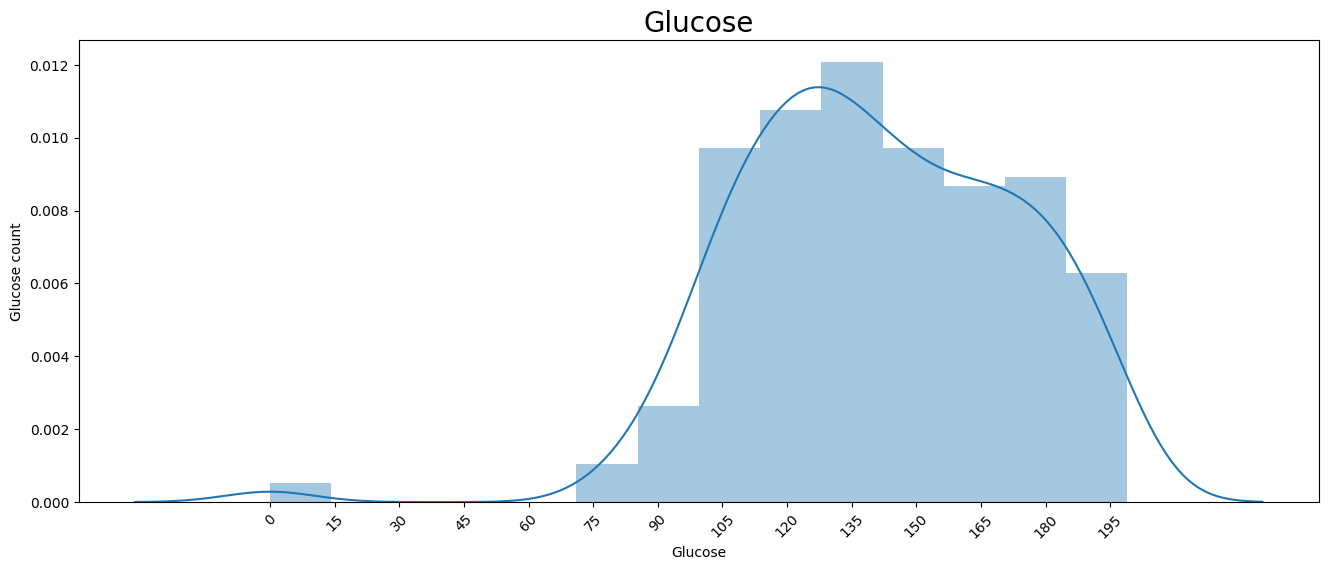

In [567]:
fig = plt.figure(figsize=(16,6))

sns.distplot(dataset["Glucose"][dataset["Outcome"] ==1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

C:\Users\darkw\AppData\Local\Temp\ipykernel_21760\694509068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])


Text(0.5, 1.0, 'Insulin')

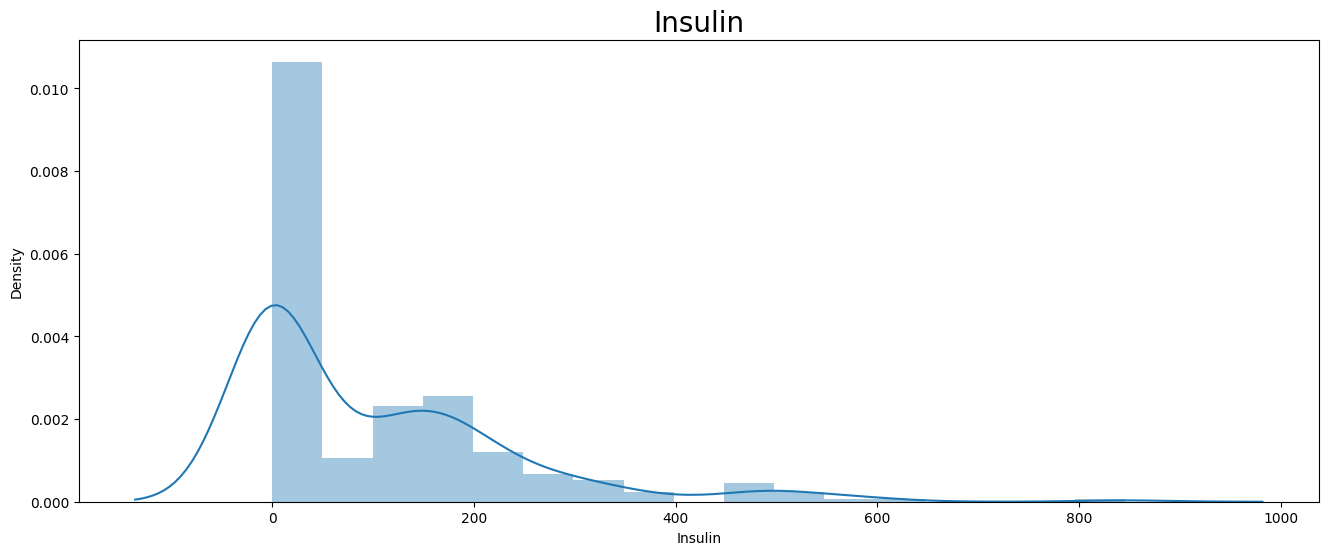

In [568]:
fig = plt.figure(figsize=(16,6))
sns.distplot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize=20)

C:\Users\darkw\AppData\Local\Temp\ipykernel_21760\3379598697.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["BMI"][dataset["Outcome"]==1])


Text(0.5, 1.0, 'BMI')

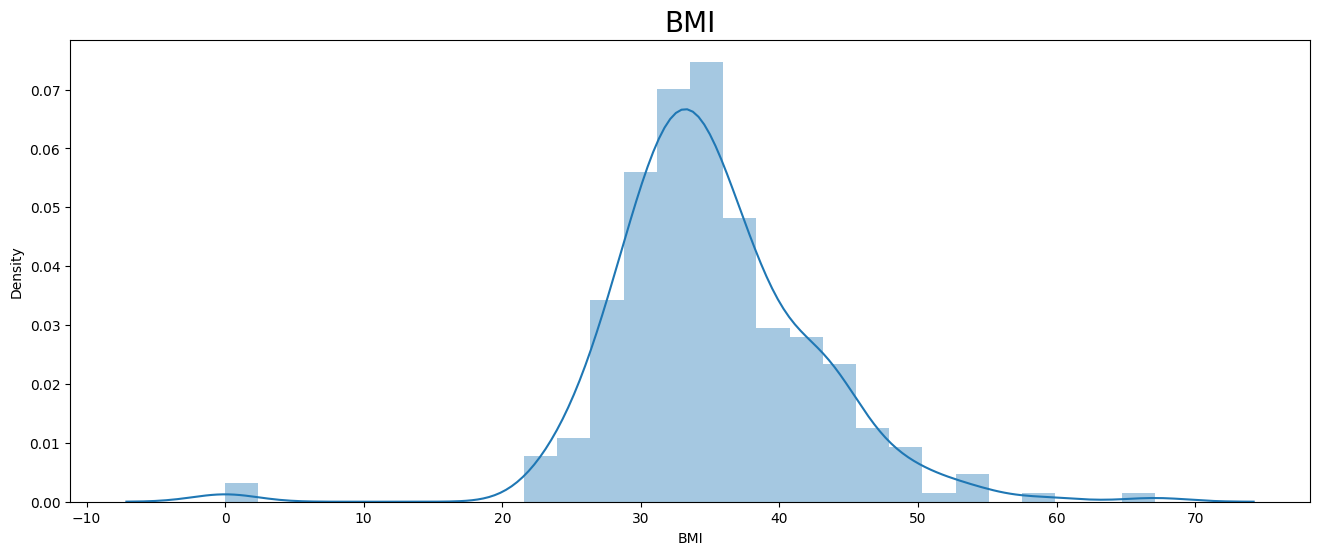

In [569]:
fig = plt.figure(figsize=(16,6))
sns.distplot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

In [570]:
y = dataset.iloc[:,-1]

In [571]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.13,random_state=0)

In [572]:
x_train.shape

(668, 8)

In [573]:
x_test.shape

(100, 8)

In [574]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [575]:
x_train

array([[-1.13588314, -0.21193895,  0.55681936, ...,  1.54210011,
        -0.90862605, -0.53625609],
       [-0.54837254, -0.68851622, -0.88387082, ..., -0.94627272,
         0.51775652, -1.03949056],
       [ 0.03913806, -0.33902622,  1.17425801, ...,  0.70417864,
        -0.83578949, -0.28463886],
       ...,
       [ 0.03913806, -0.84737531, -0.21497895, ..., -0.93357694,
        -0.96628832, -1.03949056],
       [ 2.09542514, -1.13332166,  0.24810004, ..., -0.24800483,
        -0.50499013,  0.1347232 ],
       [ 0.33289335,  0.48704104,  0.6597258 , ..., -4.06943453,
         0.52686109,  2.98638518]])

# RANDOM FOREST

In [576]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=60)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=60)

In [577]:
clf_y_pred = clf.predict(x_test)

<Axes: >

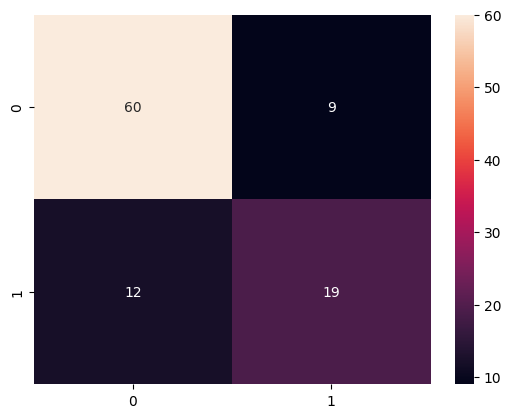

In [578]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test,clf_y_pred)
sns.heatmap(clf_cm,annot = True)

In [579]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_y_pred)

0.79

# Linear Discriminant Analysis

In [580]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=1)

In [581]:
lda_y_pred = lda.predict(x_test)

<Axes: >

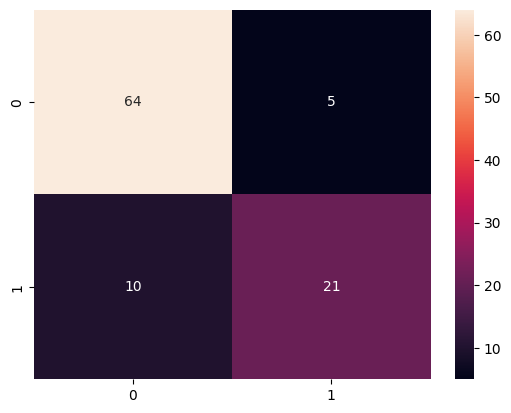

In [582]:
from sklearn.metrics import confusion_matrix
lda_cm = confusion_matrix(y_test,lda_y_pred)
sns.heatmap(lda_cm,annot = True)

In [583]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lda_y_pred)

0.85

In [584]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lda_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        69
           1       0.81      0.68      0.74        31

    accuracy                           0.85       100
   macro avg       0.84      0.80      0.82       100
weighted avg       0.85      0.85      0.85       100



# Naive Bayes

In [585]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [586]:
gnb_y_pred = gnb.predict(x_test)

<Axes: >

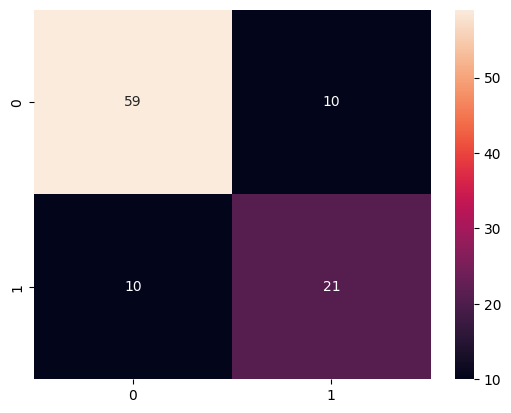

In [587]:
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_test,gnb_y_pred)
sns.heatmap(gnb_cm,annot = True)

In [588]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb_y_pred)

0.8

# XGBoost

In [589]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.01,max_depth=9,min_child_weight=2,gamma=0.3,subsample=0.8,colsample_bytree=0.7,objective='binary:logistic',nthread=-1,scale_pos_weight=1)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, nthread=-1, num_parallel_tree=None,
              predictor=None, ...)

In [590]:
xgb_y_pred = model.predict(x_test)

<Axes: >

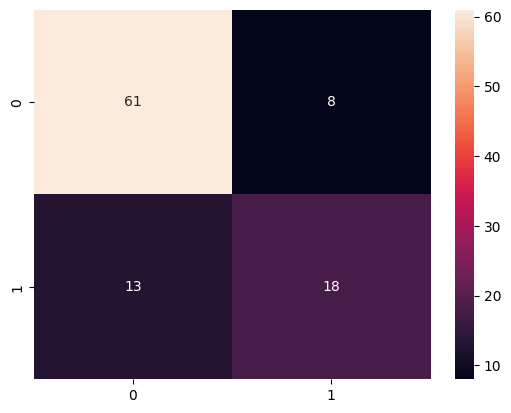

In [591]:
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
sns.heatmap(xgb_cm,annot = True)

In [592]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xgb_y_pred)

0.79

# NEURAL NETWORKS 

In [593]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

c:\users\darkw\pycharmprojects\researchpaper\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

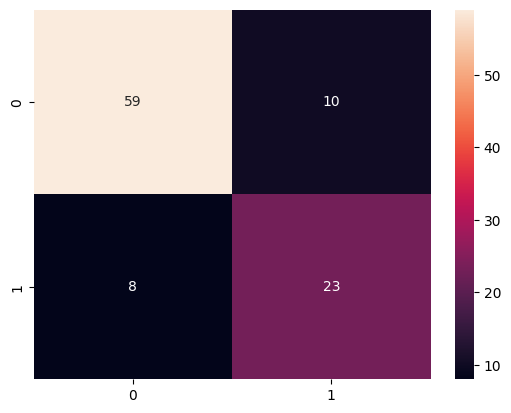

In [594]:
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(y_test,predictions)
sns.heatmap(nn_cm,annot = True)

In [595]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.82

# DECISION TREE

In [596]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,oob_score=True)
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [597]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,random_state=42)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

<Axes: >

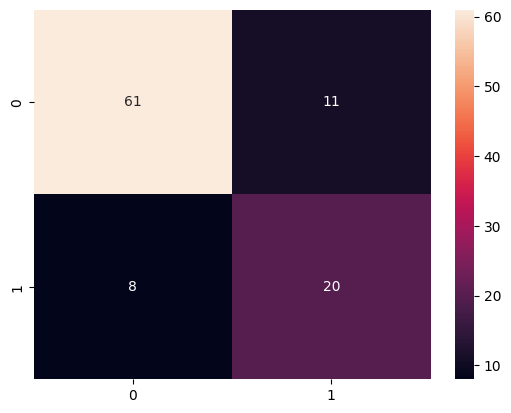

In [598]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(bagging.predict(x_test),y_test)
sns.heatmap(dt_cm,annot = True)

In [599]:
from sklearn.metrics import accuracy_score
accuracy_score(bagging.predict(x_test),y_test)

0.81